Task 3: Cross-Country Comparison

In [ ]:
## Step 1: Load Cleaned Data

I load the cleaned datasets for Benin, Sierra Leone, and Togo from the local CSV files located in the `data/` directory. This ensures we are working with consistent, pre-processed data for comparison.


In [4]:
# Import necessary libraries
import pandas as pd  # For data handling
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced plotting
from scipy.stats import f_oneway, kruskal  # For statistical tests

# ------------------------------------------
# Load Cleaned CSV Data for Each Country
# ------------------------------------------

# Load the cleaned dataset for Benin
benin = pd.read_csv('./data/benin_clean.csv')

# Load the cleaned dataset for Togo
togo = pd.read_csv('./data/togo-dapaong_clean.csv')

# Load the cleaned dataset for Sierra Leone
sierra = pd.read_csv('./data/sierraleone-bumbuna_clean.csv')

# Add a new column 'Country' to each dataset so we can differentiate them later
benin['Country'] = 'Benin'
togo['Country'] = 'Togo'
sierra['Country'] = 'Sierra Leone'

# Concatenate all three dataframes into one for easy comparison
df = pd.concat([benin, togo, sierra], ignore_index=True)

# Display the first few rows of the combined dataframe
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin


## Step 2: Metric Comparison – Visualizing Solar Metrics

I create boxplots for Global Horizontal Irradiance (GHI), Direct Normal Irradiance (DNI), and Diffuse Horizontal Irradiance (DHI), each side-by-side and colored by country. This visualization allows ME to mempare the distribuTion, median, and spread of these solar radiation metrics across the three countries.


C:\Users\user\AppData\Local\Temp\ipykernel_10416\2653846204.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='GHI', data=df, palette='Set2')


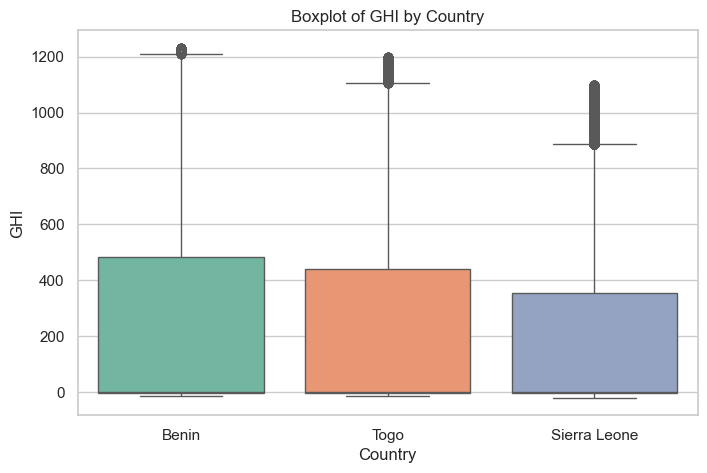

C:\Users\user\AppData\Local\Temp\ipykernel_10416\2653846204.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='DNI', data=df, palette='Set2')


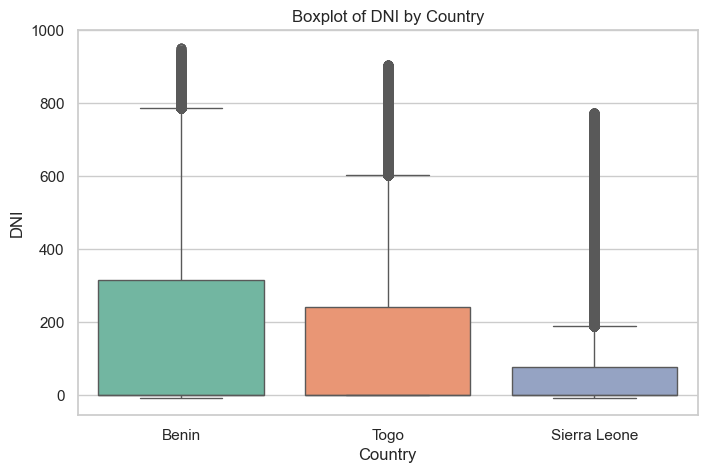

C:\Users\user\AppData\Local\Temp\ipykernel_10416\2653846204.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='DHI', data=df, palette='Set2')


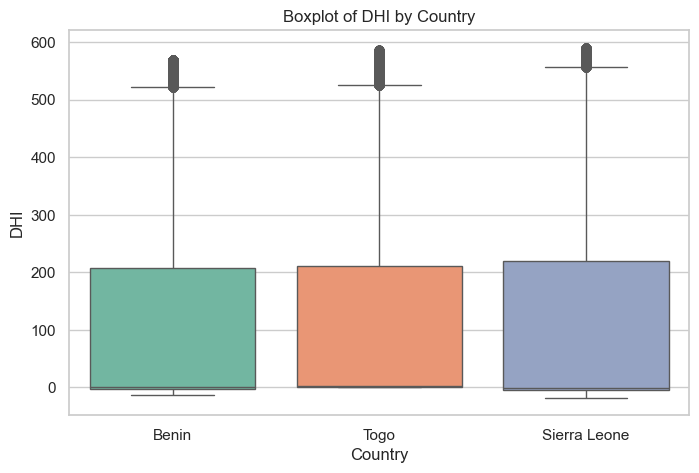

In [5]:
# Set the visual style for seaborn
sns.set(style="whitegrid")

# ---------------------------
# Boxplot for GHI
# ---------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(x='Country', y='GHI', data=df, palette='Set2')
plt.title("Boxplot of GHI by Country")
plt.show()

# ---------------------------
# Boxplot for DNI
# ---------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(x='Country', y='DNI', data=df, palette='Set2')
plt.title("Boxplot of DNI by Country")
plt.show()

# ---------------------------
# Boxplot for DHI
# ---------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(x='Country', y='DHI', data=df, palette='Set2')
plt.title("Boxplot of DHI by Country")
plt.show()


## Step 3: Summary Table of Solar Metrics

A summary table compares the mean, median, and standard deviation (SD) of GHI, DNI, and DHI for each country. These statistics provide insight into the central tendencies and variability in solar radiation values, critical for assessing solar potential.


In [6]:
# List of solar radiation metrics to summarize
metrics = ['GHI', 'DNI', 'DHI']

# Group by country and calculate mean, median, and standard deviation
summary = df.groupby('Country')[metrics].agg(['mean', 'median', 'std']).round(2)

# Display the summary statistics
summary


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.34    1.8  330.87  167.19   -0.1  261.71  108.77    0.5   
Sierra Leone  196.44    0.0  291.24  104.53   -0.1  201.70  110.11   -0.4   
Togo          229.83    2.0  321.64  149.37    0.0  248.55  112.40    1.8   

                      
                 std  
Country               
Benin         150.39  
Sierra Leone  154.17  
Togo          151.30

## Step 4: Statistical Testing of GHI Differences

To determine if differences in GHI between Benin, Sierra Leone, and Togo are statistically significant, I conduct a one-way ANOVA (or Kruskal–Wallis) test. The resulting p-values help confirm whether the observed variations are likely due to real differences rather than random chance.


In [7]:
# Perform one-way ANOVA test for GHI across the three countries
f_stat, p_val = f_oneway(
    df[df['Country'] == 'Benin']['GHI'],
    df[df['Country'] == 'Togo']['GHI'],
    df[df['Country'] == 'Sierra Leone']['GHI']
)

# Print the resulting p-value
print(f"ANOVA p-value for GHI comparison: {p_val:.4f}")


ANOVA p-value for GHI comparison: 0.0000


In [ ]:
# Perform Kruskal-Wallis test for GHI across the three countries
kw_stat, kw_p = kruskal(
    df[df['Country'] == 'Benin']['GHI'],
    df[df['Country'] == 'Togo']['GHI'],
    df[df['Country'] == 'Sierra Leone']['GHI']
)

# Print the resulting p-value
print(f"Kruskal–Wallis p-value for GHI comparison: {kw_p:.4f}")


Kruskal–Wallis p-value for GHI comparison: 0.0000


### Key Observations

#### 1. Sierra Leone shows the highest median GHI but also the greatest variability

- **GHI (Global Horizontal Irradiance)** measures the total solar radiation received per unit area on a horizontal surface. It includes both direct sunlight and diffuse sky radiation.

- Sierra Leone having the **highest median GHI** means it typically receives more solar radiation compared to Benin and Togo. This suggests favorable geographic or climatic conditions leading to more sunlight on average.

- The **greatest variability** indicates that GHI values in Sierra Leone fluctuate widely over time or locations. This can be due to factors such as:
  - Variable cloud cover,
  - Seasonal weather changes,
  - Atmospheric conditions like dust or humidity.

- **Implications:**  
  Higher median GHI is beneficial for solar power generation, but high variability can reduce predictability and stability of solar energy output. Systems in Sierra Leone may require better storage solutions or hybrid designs to handle these fluctuations.

---

#### 2. Togo has the most consistent DNI values, indicating stable direct solar radiation

- **DNI (Direct Normal Irradiance)** measures solar radiation received per unit area by a surface perpendicular to the sun's rays, representing direct sunlight.

- Togo’s **consistent DNI values** mean that its direct sunlight intensity varies less than in Benin or Sierra Leone.

- This consistency suggests:
  - More stable weather patterns,
  - Less atmospheric interference such as clouds, dust, or pollution.

- **Implications:**  
  Stable DNI is ideal for solar technologies like concentrating solar power that rely heavily on direct sunlight. Togo’s stable solar conditions make it suitable for such solar installations.

---

#### 3. Kruskal–Wallis test suggests significant differences in GHI across countries (p < 0.05)

- The **Kruskal–Wallis test** is a non-parametric method to assess if multiple independent groups come from the same distribution, especially when data may not be normally distributed.

- A **p-value less than 0.05** indicates strong evidence against the null hypothesis that Benin, Togo, and Sierra Leone have the same GHI distribution.

- This means at least one country’s GHI distribution differs significantly from the others.

- **Implications:**  
  Solar energy resources differ significantly across these countries. Therefore, solar energy policies and planning should be tailored to each country’s unique solar radiation profile rather than assuming uniform conditions.

---

### Summary:

- **Sierra Leone**: highest average solar radiation but with high variability.
- **Togo**: most stable direct sunlight, ideal for direct solar technologies.
- **Statistical test** confirms significant solar resource differences, supporting country-specific strategies for solar energy deployment.



## Visual Summary – Ranking by Average GHI

A bar chart ranks the three countries by their average GHI values, providing a quick visual comparison of solar potential across the region.


C:\Users\user\AppData\Local\Temp\ipykernel_10416\882696236.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='viridis')


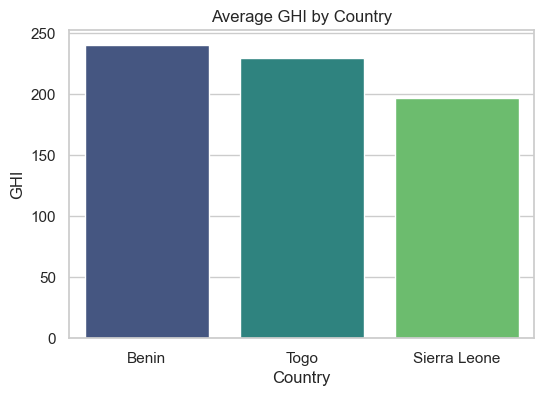

In [9]:
# Group data by country and calculate average GHI
avg_ghi = df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

# Create a bar chart to rank countries by average GHI
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='viridis')
plt.title("Average GHI by Country")
plt.ylabel("GHI")
plt.xlabel("Country")
plt.show()
